In [ ]:
# مكتبة للتعامل مع نظام التشغيل والملفات
import os
# مسار الصور
images_dir = "images\\"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# مكتبات أساسية
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

images_dir = "/content/drive/MyDrive/images/"


Mounted at /content/drive


In [ ]:
# قائمة أسماء الأصناف
classes=os.listdir(images_dir)
# عدد الأصناف
count_classes=len(classes)
classes

['Disgust', 'Neutral', 'Angry', 'Happy', 'Fear']

In [ ]:
# حساب توزع الصور على المشاعر
total=0
dict={}
# الدوران على المجلدات الفرعية
for folder in os.listdir(images_dir) :
    # عدد الملفات في المجلد
    c_total= len(os.listdir(images_dir+folder))
    # الإضافة للقاموس
    dict[folder]= c_total
    # مجموع تراكمي
    total = total + c_total

print("Total images : ", total)
print("Count images in each class ", dict)

Total images :  16996
Count images in each class  {'Disgust': 380, 'Neutral': 4355, 'Angry': 2832, 'Happy': 6894, 'Fear': 2535}


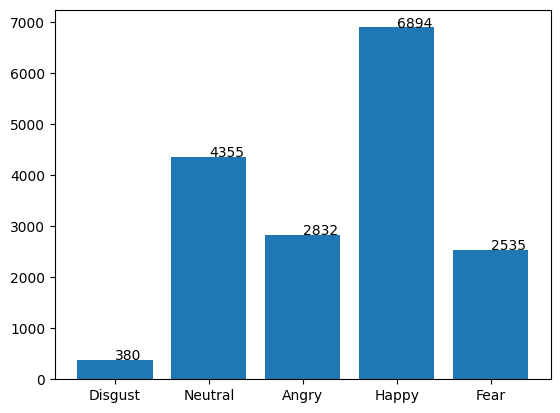

In [ ]:
# مكتبة الرسم
import matplotlib.pyplot as plt
import numpy as np
# الأصناف
classes = list(dict.keys())
# الأعداد
classes_count = list(dict.values())
# إضافة الأعداد في رؤوس الأشرطة
for i in range(len(classes)):
    plt.text(i,classes_count[i],classes_count[i])
# رسم الأشرطة
plt.bar(range(len(dict)), classes_count, tick_label=classes)
plt.show()

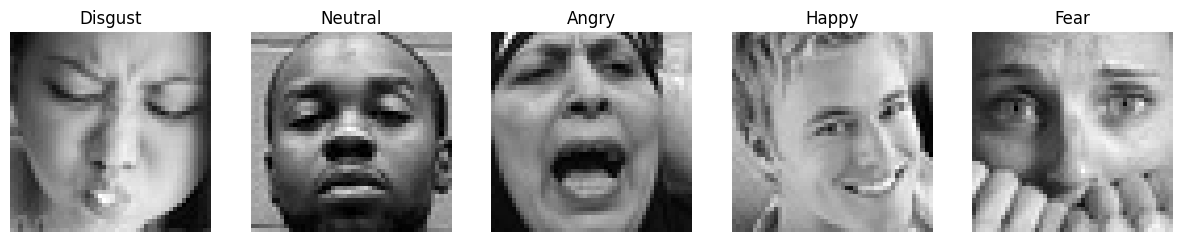

In [ ]:
# Python Imaging Library
# pip install Pillow
from PIL import Image

# إنشاء شكل من صف و خمسة أعمدة
fig, axs = plt.subplots(1, len(classes), figsize=(15, 3))
# الدوران على المجلدات المسماة بالأصناف
for i, class_name in enumerate(classes):
    # قائمة ملفات المجلد
    class_images = os.listdir(os.path.join(images_dir, class_name))
    # مسار أول صورة من المجلد
    img_path = os.path.join(images_dir, class_name, class_images[0])
    # تحميل الصورة
    img = Image.open(img_path)
    # إظهار الصورة
    axs[i].imshow(img, cmap='gray')
    # عنوان الصورة
    axs[i].set_title(class_name)
    # حذف المحاور
    axs[i].axis('off')

plt.show()

In [ ]:
# تحديد قياس الصور
Image_Height = 48
Image_Width = 48
# قياس الصور المناسب
target_size = (Image_Height, Image_Width)

In [ ]:
# قائمة بأسماء ملفات الصور
image_files = []
# قائمة بتسمية الصنف الموافق
labels = []


# تعبئة القوائم
for root, dirs, files in os.walk(images_dir):
    for file in files:
        # اختبار الصور من اللاحقة
        if file.endswith(('.jpg', '.jpeg', '.png')):
            # الإضافة لقائمة أسماء الملفات
            image_files.append(os.path.join(root, file))
            # إضافة اسم الصنف
            labels.append(os.path.basename(root))

In [ ]:
print(image_files[0])
print(labels[0])

/content/drive/MyDrive/images/Disgust/Training_42551369.jpg
Disgust


In [ ]:
# التقسيم لتدريب واختبار
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_files, labels, test_size=0.2, random_state=42)

In [ ]:
# تحميل صورة والمعالجة الأولية لها
def load_and_preprocess_image(image_path, target_size):
    # تحميل صورة
    img = Image.open(image_path)
    # التحويل لصور ملونة
    img = img.convert('RGB') if img.mode != 'RGB' else img
    # ضبط حجم الصورة
    img = img.resize(target_size)
    # التحويل لمصفوفة نمباي وتقييس الصورة
    img = np.array(img) / 255.0
    return img

In [ ]:
# تطبيق الدالة السابقة
X_train_processed = np.array([load_and_preprocess_image(image_path, target_size) for image_path in X_train])
X_test_processed = np.array([load_and_preprocess_image(image_path, target_size) for image_path in X_test])


In [ ]:
# مكتبة مرمز الأصناف
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# ترميز خرج التدريب
y_train_encoded = label_encoder.fit_transform(y_train)
# ترميز خرج الاختبار
y_test_encoded = label_encoder.transform(y_test)
y_test_encoded

array([2, 3, 4, ..., 0, 3, 4])

In [ ]:
# قائمة أسماء الأصناف مفهرسة وفق الترميز
classes_labels=[]
for i in range(count_classes):
    class_label=label_encoder.inverse_transform([i])
    classes_labels.append(class_label[0])
classes_labels

[np.str_('Angry'),
 np.str_('Disgust'),
 np.str_('Fear'),
 np.str_('Happy'),
 np.str_('Neutral')]

In [ ]:
# مكتبة تحويل الترميز إلى فئوي
from keras.utils import to_categorical
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)
y_test_categorical

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
# تثبيت العشوائية لتوليد نفس النتائج كل مرة
import random
import numpy as np
import tensorflow as tf
# يُمكن استخدام أي رقم لبذرة العشوائيه
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

In [ ]:
from keras.applications import VGG16

# تحميل النموذج المدرب
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(Image_Height, Image_Width, 3))

# تجميد كافة طبقات النموذج المدرب
for layer in base_model.layers:
    layer.trainable = False

print("Layers : ", len(base_model.layers))
base_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Layers :  19


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Flatten, Dense, Dropout
from keras.optimizers import Adam

# نموذج تسلسلي
model = Sequential()
# طبقة الدخل
model.add(Input(shape=(Image_Height, Image_Width, 3)))
# إضافة النموذج المدرب
model.add(base_model)
# إضافة طبقة تسطيح
model.add(Flatten())
# طبقة تسريب
model.add(Dropout(0.2))
# طبقة كثيفة
model.add(Dense(128, activation='relu'))
# طبقة تسريب
model.add(Dropout(0.2))
# طبقة كثيفة
model.add(Dense(64, activation='relu'))
# طبقة الخرج
model.add(Dense(count_classes, activation='softmax'))

# تهيئة النموذج
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# طباعة ملخص النموذج
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,788,933 (56.42 MB)

 Trainable params: 74,245 (290.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
print("\nTraining with augmentation...")
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
augmented_generator = datagen.flow(X_train_processed, y_train_categorical, batch_size=32)
history_aug = model.fit(augmented_generator, epochs=100, validation_data=(X_test_processed, y_test_categorical))


Training with augmentation...
Epoch 1/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.5202 - loss: 1.1664 - val_accuracy: 0.5132 - val_loss: 1.1798
Epoch 2/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.5143 - loss: 1.1803 - val_accuracy: 0.5174 - val_loss: 1.1860
Epoch 3/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.5130 - loss: 1.1716 - val_accuracy: 0.5297 - val_loss: 1.1725
Epoch 4/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.5207 - loss: 1.1728 - val_accuracy: 0.5144 - val_loss: 1.1795
Epoch 5/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.5194 - loss: 1.1620 - val_accuracy: 0.5197 - val_loss: 1.1826
Epoch 6/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.5195 - loss: 1.1670 - val_accuracy: 0.5285 - val_loss: 1.1759
Epoch 7/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.5185 - loss: 1.1626 - val_accuracy: 0.5194 - val_loss: 1.1829
Epoch 8/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/st

In [ ]:
# تدريب النموذج
epochs = 16
history = model.fit(
    X_train_processed,
    y_train_categorical,
    epochs=epochs,
    validation_data=(X_test_processed, y_test_categorical)
)

Epoch 1/16
422/422 [==============================] - 84s 194ms/step - loss: 1.3378 - accuracy: 0.4318 - val_loss: 1.2685 - val_accuracy: 0.4873
Epoch 2/16
422/422 [==============================] - 78s 186ms/step - loss: 1.2733 - accuracy: 0.4683 - val_loss: 1.2461 - val_accuracy: 0.4917
Epoch 3/16
422/422 [==============================] - 81s 193ms/step - loss: 1.2434 - accuracy: 0.4829 - val_loss: 1.2087 - val_accuracy: 0.5068
Epoch 4/16
422/422 [==============================] - 81s 192ms/step - loss: 1.2220 - accuracy: 0.4933 - val_loss: 1.2165 - val_accuracy: 0.5021
Epoch 5/16
422/422 [==============================] - 83s 196ms/step - loss: 1.2128 - accuracy: 0.5021 - val_loss: 1.2013 - val_accuracy: 0.5148
Epoch 6/16
422/422 [==============================] - 79s 188ms/step - loss: 1.1971 - accuracy: 0.5073 - val_loss: 1.1979 - val_accuracy: 0.5240
Epoch 7/16
422/422 [==============================] - 80s 191ms/step - loss: 1.1827 - accuracy: 0.5198 - val_loss: 1.1816 - val_ac

In [ ]:
# تقييم النموذج

score = model.evaluate(X_test_processed, y_test_categorical)
print('Test accuracy:', round(score[1]*100, 2))

107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5267 - loss: 1.1948
Test accuracy: 53.09


In [ ]:
# تجميد كافة طبقات النموذج المدرب
for layer in base_model.layers:
    layer.trainable = False
# صقل النموذج المدرب بفك تجميد بعض الطبقات الأخيرة منه
for layer in base_model.layers[-4:]:
    layer.trainable = True

In [ ]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
# نموذج تسلسلي
model = Sequential()
# طبقة الدخل
model.add(Input(shape=(Image_Height, Image_Width, 3)))
# إضافة النموذج المدرب
model.add(base_model)
# إضافة طبقة تسطيح
model.add(Flatten())
# طبقة تسريب
model.add(Dropout(0.2))
# طبقة كثيفة
model.add(Dense(128, activation='relu'))
# طبقة تسريب
model.add(Dropout(0.2))
# طبقة كثيفة
model.add(Dense(64, activation='relu'))
# طبقة الخرج
model.add(Dense(count_classes, activation='softmax'))

# تهيئة النموذج
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# طباعة ملخص النموذج
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,788,933 (56.42 MB)

 Trainable params: 7,153,669 (27.29 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
print("\nTraining with augmentation...")
from tensorflow.keras.callbacks import EarlyStopping
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=3,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.15,  # new
    shear_range=0.15,  # new
    horizontal_flip=True,
    fill_mode='nearest'
)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
augmented_generator = datagen.flow(X_train_processed, y_train_categorical, batch_size=32)
history_aug = model.fit(augmented_generator, epochs=8, validation_data=(X_test_processed, y_test_categorical),
                         callbacks=[early_stop])


Training with augmentation...
Epoch 1/8
425/425 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.5884 - loss: 1.0489 - val_accuracy: 0.6544 - val_loss: 0.9142
Epoch 2/8
425/425 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.5917 - loss: 1.0423 - val_accuracy: 0.6515 - val_loss: 0.9169
Epoch 3/8
425/425 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.5904 - loss: 1.0323 - val_accuracy: 0.6432 - val_loss: 0.9641
Epoch 4/8
425/425 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.6026 - loss: 1.0180 - val_accuracy: 0.6476 - val_loss: 0.9774
Epoch 5/8
425/425 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.5969 - loss: 1.0209 - val_accuracy: 0.6541 - val_loss: 0.9198
Epoch 6/8
425/425 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.5999 - loss: 1.0158 - val_accuracy: 0.6559 - val_loss: 0.9170


In [ ]:
# تقييم النموذج

score = model.evaluate(X_test_processed, y_test_categorical)
print('Test accuracy:', round(score[1]*100, 2))

107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6550 - loss: 0.9194
Test accuracy: 65.44


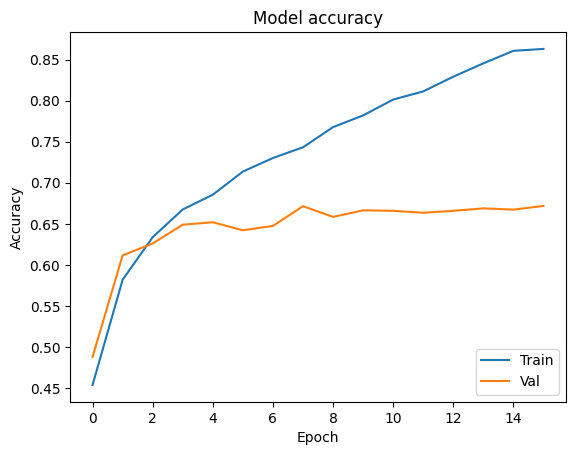

In [ ]:
# مشاهدة دقة التدريب والتقييم مع عدد الدورات

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
# التنبؤ على بيانات التقييم
y_pred = model.predict(X_test_processed)
y_pred

106/106 [==============================] - 16s 146ms/step


array([[5.7268591e-07, 9.9882456e-11, 1.1009996e-05, 9.9114746e-01,
        8.8410461e-03],
       [2.1840647e-07, 4.6493569e-12, 1.5231499e-06, 9.9855095e-01,
        1.4472498e-03],
       [7.4766279e-04, 1.5642655e-07, 9.5269067e-04, 9.9779069e-01,
        5.0880789e-04],
       ...,
       [3.8500884e-01, 2.1694380e-08, 1.1718747e-01, 4.9780113e-01,
        2.6072439e-06],
       [7.8079951e-01, 1.6064000e-04, 2.1403290e-01, 4.1534677e-03,
        8.5339800e-04],
       [6.3132930e-01, 4.9773090e-02, 2.6373348e-01, 1.2783766e-02,
        4.2380430e-02]], dtype=float32)

In [ ]:
# التحويل من احتمالات الأصناف إلى ترميزها
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([3, 3, 3, ..., 3, 0, 0], dtype=int64)

In [ ]:
# إيجاد تسميات الأصناف الموافقة للترميزات
pred_class_labels = []
for c in y_pred:
    pred_class_labels.append(label_encoder.inverse_transform([c])[0])

pred_class_labels

['Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Angry',
 'Happy',
 'Happy',
 'Fear',
 'Happy',
 'Happy',
 'Angry',
 'Happy',
 'Happy',
 'Angry',
 'Happy',
 'Neutral',
 'Neutral',
 'Neutral',
 'Fear',
 'Fear',
 'Happy',
 'Neutral',
 'Fear',
 'Fear',
 'Happy',
 'Neutral',
 'Disgust',
 'Angry',
 'Fear',
 'Happy',
 'Happy',
 'Fear',
 'Fear',
 'Happy',
 'Neutral',
 'Happy',
 'Neutral',
 'Fear',
 'Angry',
 'Angry',
 'Fear',
 'Happy',
 'Happy',
 'Fear',
 'Happy',
 'Angry',
 'Happy',
 'Happy',
 'Fear',
 'Neutral',
 'Neutral',
 'Happy',
 'Angry',
 'Happy',
 'Neutral',
 'Happy',
 'Happy',
 'Neutral',
 'Angry',
 'Happy',
 'Neutral',
 'Happy',
 'Neutral',
 'Neutral',
 'Happy',
 'Happy',
 'Neutral',
 'Neutral',
 'Neutral',
 'Happy',
 'Happy',
 'Neutral',
 'Angry',
 'Happy',
 'Disgust',
 'Happy',
 'Happy',
 'Angry',
 'Disgust',
 'Neutral',
 'Neutral',
 'Neutral',
 'Angry',
 'Fear',
 'Angry',
 'Happy',
 'Fear',
 'Happy',
 'Happy',
 'Happy',
 'Happ

In [ ]:
# مصفوفة الارتباك
from sklearn.metrics import confusion_matrix
# حساب مصفوفة الارتباك
cm = confusion_matrix(y_test, pred_class_labels)
cm

array([[ 289,    5,   83,   83,   88],
       [  24,   27,    8,    8,   11],
       [  78,    1,  277,   77,   70],
       [  69,    1,   65, 1159,  102],
       [  96,    0,   74,  165,  516]], dtype=int64)

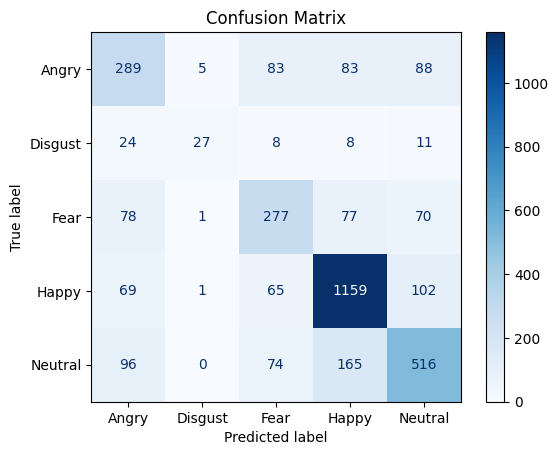

In [ ]:
from sklearn.metrics import  ConfusionMatrixDisplay
# رسم مصفوفة الارتباك
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()